In [72]:
#Create data frames

#Top 10000 File
import pandas as pd

#top_10000_file='./data/top_10000_1960-now.csv'

#albums=pd.read_csv(top_10000_file,header=0)

#albums.head(2)

#Events File
world_events_file='./data/copy_Events.csv'

events=pd.read_csv(world_events_file,header=0)

events.head(2)


,Year,Event Description
0,2004,9/11 Commission
1,2001,Anthrax Attacks U.S.


In [69]:
############# Profiling and Transformation section ############################

#***************************** 'Albums' transformation ***************************************

#change 'album release date' column to release_date
#albums=albums.rename(columns={'Album Release Date':'release_date'})

#albums.head(1)

#show dates in ascending order 
#albums.sort_values(['release_date'],ascending=True)

#show blank rows
#albums.loc[albums.release_date.isna()]

#drop blank rows
#albums.dropna(subset=['release_date'],inplace=True)

#show datatypes in 'albums'
#print(albums.dtypes)

#change 'release_date' object to a datetime object
# 'errors=coerce' will change any bad date values to 'NaT' which means 'Not a Time'
#albums['release_date']=pd.to_datetime(albums['release_date'],format='%Y-%m-%d',errors='coerce')

# Add 'album_year' column to top 10000 file
#albums['album_year']=albums['release_date'].dt.year

#Show updated dataframe with new column
#albums.sort_values(['release_date'],ascending=True)

#*************************************** 'Events' transformation *****************************
#show datatypes in 'events'
print(events.dtypes)


Year                  int64
Event Description    object
dtype: object


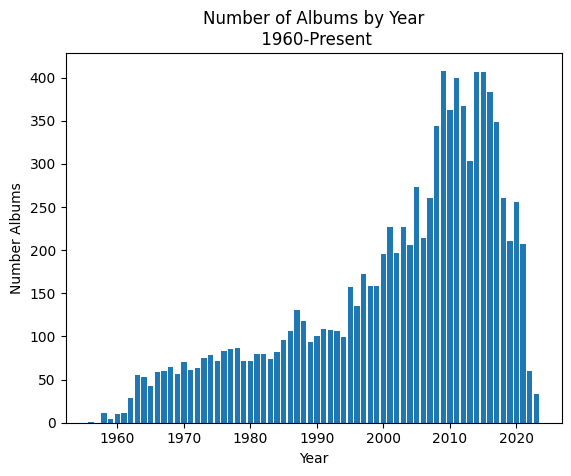

Artist Name(s)            album_year
"Weird Al" Yankovic       2009          1
*NSYNC                    1997          2
                          2000          3
                          2001          1
                          2005          1
                                       ..
will.i.am, Cody Wise      2014          2
will.i.am, Eva Simons     2013          1
will.i.am, Justin Bieber  2013          2
will.i.am, Miley Cyrus    2013          1
will.i.am, Nicki Minaj    2010          1
Name: album_year, Length: 6791, dtype: int64

In [74]:
################## Create Visuals ################

#********** Number of Albums by Year #########
import matplotlib.pyplot as plt

#Create a variable to hold a count of unique album years(value_counts), then sort in ascending order (sort_index)
album_count=albums['album_year'].value_counts().sort_index()

#Create the bar chart with 'album_count.index' for the x axis and album_count.values for the Y axis
plt.bar(album_count.index,album_count.values)

# Add a title to the chart
plt.title("Number of Albums by Year\n 1960-Present")

#Label the X and Y axis
plt.xlabel('Year')
plt.ylabel('Number Albums')

#Show the chart
plt.show()

#Show number of albums by artist and year
albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).album_year.count()
albums_per_artist


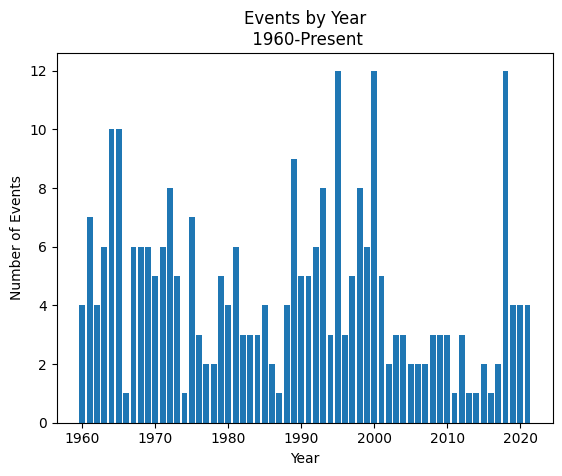

In [73]:
#**************************** Number of events by Year ****************************

import matplotlib.pyplot as plt

#Create a variable to hold a count of unique Event years(value_counts), then sort in ascending order (sort_index)
event_count=events['Year'].value_counts().sort_index()

#Create the bar chart with 'event_count.index' for the x axis and event_count.values for the Y axis
plt.bar(event_count.index,event_count.values)

# Add a title to the chart
plt.title("Events by Year\n 1960-Present")

#Label the X and Y axis
plt.xlabel('Year')
plt.ylabel('Number of Events')

#Show the chart
plt.show()

#Show number of albums by artist and year
albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).album_year.count()
albums_per_artist

Artist Name(s)            album_year
"Weird Al" Yankovic       2009          1
*NSYNC                    1997          2
                          2000          3
                          2001          1
                          2005          1
                                       ..
will.i.am, Cody Wise      2014          2
will.i.am, Eva Simons     2013          1
will.i.am, Justin Bieber  2013          2
will.i.am, Miley Cyrus    2013          1
will.i.am, Nicki Minaj    2010          1
Name: album_year, Length: 6791, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

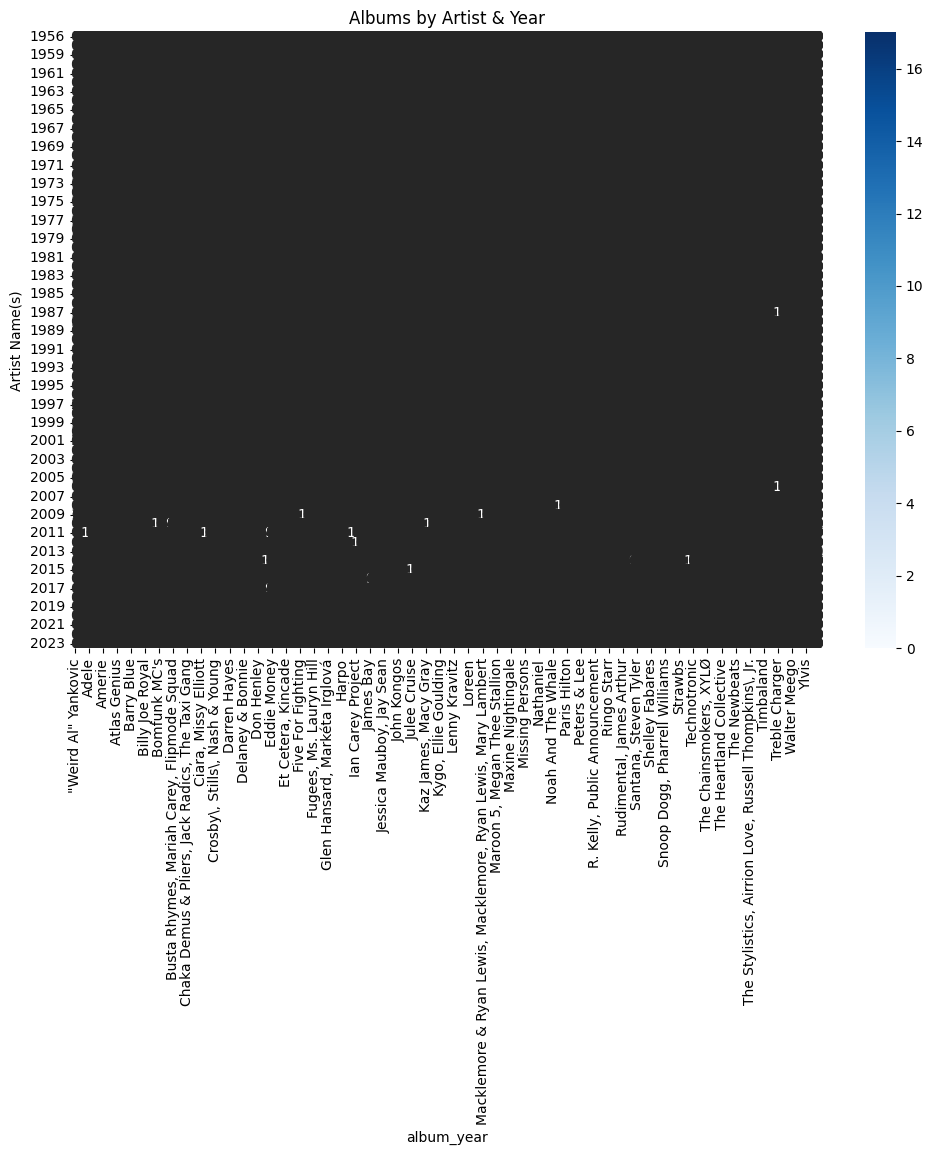

In [68]:
#Show number of albums by artist and year
#albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).album_year.count()
#albums_per_artist

import seaborn as sns

#Count the number of albums by artist and year, relabel the index to be 'record_count"
#albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).size().reset_index(name='record_count')
albums_per_artist= albums.groupby(['Artist Name(s)','album_year']).album_year.count().reset_index(name='record_count')

#Heatmap
plt.figure(figsize=(12,8))

#Create a pivot table (pivot_table()), this forms the 'shape' of  heatmap

#heatmap_data = albums_per_artist.pivot_table(index='Artist',columns='Year',values='record_count',aggfunc='sum',fill_value=0)
heatmap_data = albums_per_artist.pivot_table(index='Artist Name(s)',columns='album_year',values='record_count',aggfunc='sum',fill_value=0)

#Set the attributes of the heatmap and create the map
sns.heatmap(heatmap_data,annot=True,cmap='Blues',fmt='d')

plt.title('Albums by Artist & Year')

plt.xlabel('album_year')
plt.ylabel('Artist Name(s)')

plt.show
